In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from ens_util import *
from math import isnan
from sklearn.calibration import calibration_curve
plt.rcParams['figure.figsize'] = [9, 9]

In [5]:
data_files = glob('data_crop*.nc')
res_files = glob('2014*Z_crs_gauss.nc')
coordx = [258,260]#,262,264]
coordy = [63,65]#,67,69]
thresh = 0.2
data = build_datadf(data_files,coordx,coordy)
(fr15,fr30,fr45,fr60) = build_brier_fractions(res_files,data.index,data.columns,coordx,coordy,thresh)


In [6]:
index_dates = data.index.date
index_dates_unique = np.unique(index_dates)
index_times = data.index
bs15 = pd.DataFrame(index=index_dates_unique,columns=data.columns)
bs30 = pd.DataFrame(index=index_dates_unique,columns=data.columns)
bs45 = pd.DataFrame(index=index_dates_unique,columns=data.columns)
bs60 = pd.DataFrame(index=index_dates_unique,columns=data.columns)
bs = [bs15,bs30,bs45,bs60]
fr = [fr15,fr30,fr45,fr60]

for c in data.columns:
    for d in index_dates_unique:
        times = np.array(index_times[np.where(index_dates==d)[0]])
        for f in range(4):
            #number of valid (non NaN) contributions to BS.
            count = 0
            bs_val = 0
            for t in times:
                frac = fr[f].at[t,c]
                sat = data.at[t,c]
                if(sat<thresh):
                    obs = 1.0
                else:
                    obs = 0.0
                val = (frac-obs)**2
                if(not isnan(val)):
                    count += 1
                    bs_val += val
            bs[f].at[d,c] = bs_val/count     

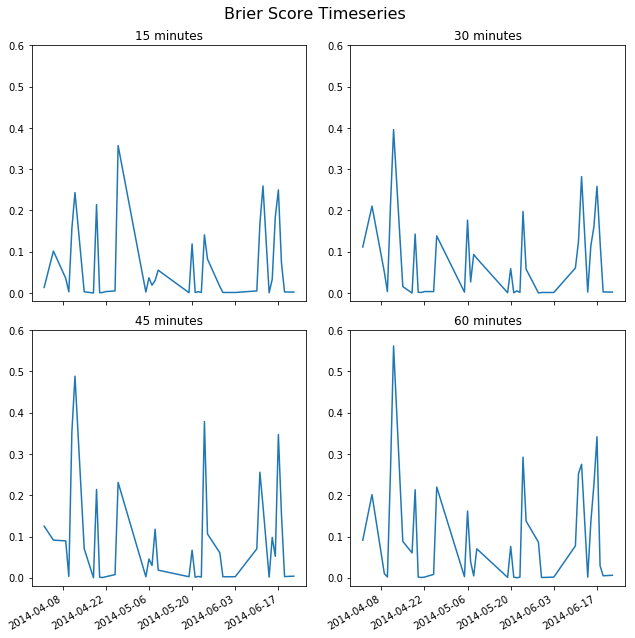

                      0            1
2014-04-02    0.0134722    0.0338889
2014-04-05     0.101667     0.173333
2014-04-09    0.0356944    0.0427778
2014-04-10    0.0028125    0.0040625
2014-04-11     0.156667     0.324167
2014-04-12     0.243333     0.201944
2014-04-15   0.00291667      0.04125
2014-04-18            0            0
2014-04-19     0.214306    0.0451389
2014-04-20  0.000555556  0.000555556
2014-04-21      0.00125      0.00125
2014-04-22   0.00347222   0.00347222
2014-04-25        0.005        0.005
2014-04-26     0.357222     0.239028
2014-05-05   0.00222222   0.00222222
2014-05-06    0.0367647    0.0461765
2014-05-07    0.0189063     0.000625
2014-05-08    0.0301786    0.0701786
2014-05-09    0.0552778    0.0413889
2014-05-19  0.000714286  0.000714286
2014-05-20     0.118906     0.107656
2014-05-21      0.00125      0.00125
2014-05-22   0.00307692   0.00307692
2014-05-23   0.00140625   0.00140625
2014-05-24     0.140882     0.161176
2014-05-25    0.0822222     0.131944
2

In [8]:
coord = 0
ymin= -0.02
ymax = 0.6
rows = 2; cols = 2;
fig,axarr = plt.subplots(rows,cols)
for r in range(rows):
    for c in range(cols):
        axarr[r,c].set_ylim([ymin,ymax])

axarr[0,0].plot(bs15.index,bs15.values[:,coord])
axarr[0,1].plot(bs30.index,bs30.values[:,coord])
axarr[1,0].plot(bs45.index,bs45.values[:,coord])
axarr[1,1].plot(bs60.index,bs60.values[:,coord])

axarr[0,0].set_title("15 minutes")
axarr[0,1].set_title("30 minutes")
axarr[1,0].set_title("45 minutes")
axarr[1,1].set_title("60 minutes")

fig.autofmt_xdate()
fig.tight_layout()
fig.suptitle("Brier Score Timeseries",fontsize=16)
fig.subplots_adjust(top=0.92)
plt.show()
print(bs15)